In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
fake['target'] = 'fake'
true['target'] = 'true'

In [8]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [9]:
data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [10]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [11]:
data.head()

,title,text,subject,date,target
0,SUNDAY SCREENING: CIA Secret Experiments (2008),"21st Century Wire says Every Sunday, our edito...",US_News,"May 22, 2016",fake
1,Mexico's new finance minister spurns Donald Trump,MEXICO CITY (Reuters) - Mexico’s new finance m...,politicsNews,"September 8, 2016",true
2,A PICTURE IS WORTH A THOUSAND WORDS: A Lone So...,We re gonna go out on a limb and guess that th...,politics,"Sep 26, 2015",fake
3,(Video) Judge Jeanine: You Can’t Trust Hillary...,"Once again, a great opening statement from Jud...",politics,"Jul 26, 2015",fake
4,"Tillerson, Russia's Lavrov discuss Syria, Ukra...",NEW YORK (Reuters) - Russian Foreign Minister ...,politicsNews,"September 18, 2017",true


In [12]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,SUNDAY SCREENING: CIA Secret Experiments (2008),"21st Century Wire says Every Sunday, our edito...",US_News,fake
1,Mexico's new finance minister spurns Donald Trump,MEXICO CITY (Reuters) - Mexico’s new finance m...,politicsNews,true
2,A PICTURE IS WORTH A THOUSAND WORDS: A Lone So...,We re gonna go out on a limb and guess that th...,politics,fake
3,(Video) Judge Jeanine: You Can’t Trust Hillary...,"Once again, a great opening statement from Jud...",politics,fake
4,"Tillerson, Russia's Lavrov discuss Syria, Ukra...",NEW YORK (Reuters) - Russian Foreign Minister ...,politicsNews,true


In [13]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer , WordNetLemmatizer
ps = PorterStemmer()
def stemming(text):
    stemmed_content = re.sub('[^a-zA-Z]',' ',text)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [14]:
data['text'] = data['text'].apply(stemming)

In [15]:
data.head()

,title,text,subject,target
0,SUNDAY SCREENING: CIA Secret Experiments (2008),st centuri wire say everi sunday editori team ...,US_News,fake
1,Mexico's new finance minister spurns Donald Trump,mexico citi reuter mexico new financ minist th...,politicsNews,true
2,A PICTURE IS WORTH A THOUSAND WORDS: A Lone So...,gonna go limb guess young man presenc harden r...,politics,fake
3,(Video) Judge Jeanine: You Can’t Trust Hillary...,great open statement judg jeanin nail,politics,fake
4,"Tillerson, Russia's Lavrov discuss Syria, Ukra...",new york reuter russian foreign minist sergei ...,politicsNews,true


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


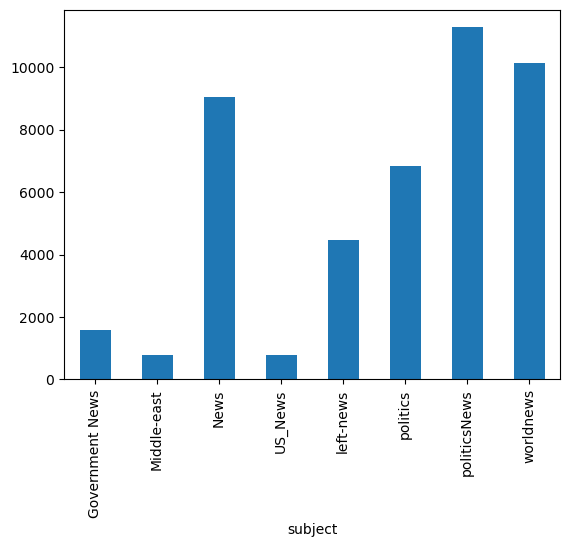

In [16]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


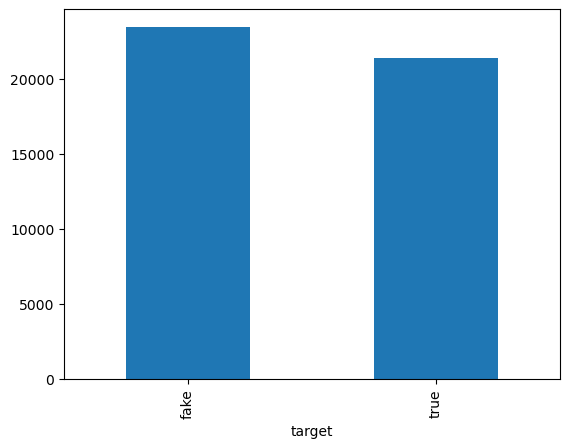

In [17]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [18]:
data.target.value_counts()

fake    23481
true    21417
Name: target, dtype: int64

In [19]:
data.isnull().sum()

title      0
text       0
subject    0
target     0
dtype: int64

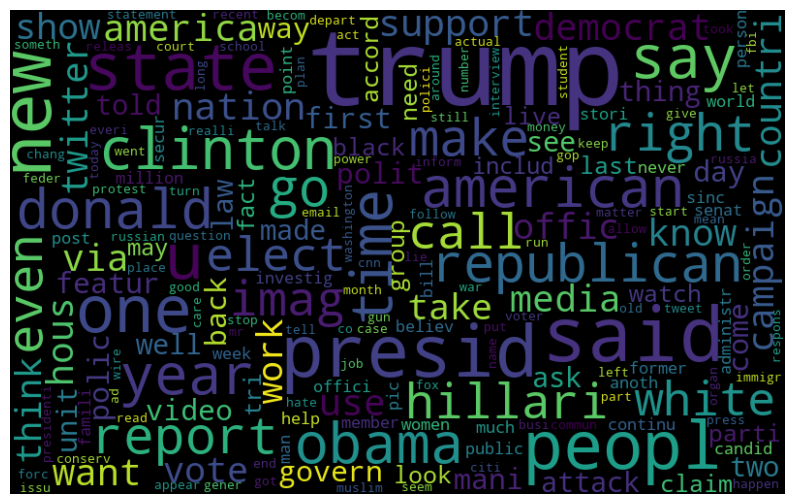

In [20]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110, collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

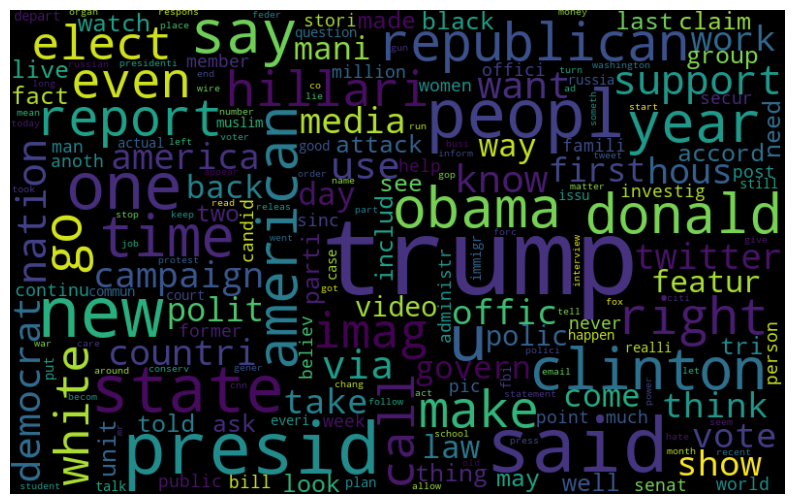

In [21]:
from wordcloud import WordCloud
real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
import nltk
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,6))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

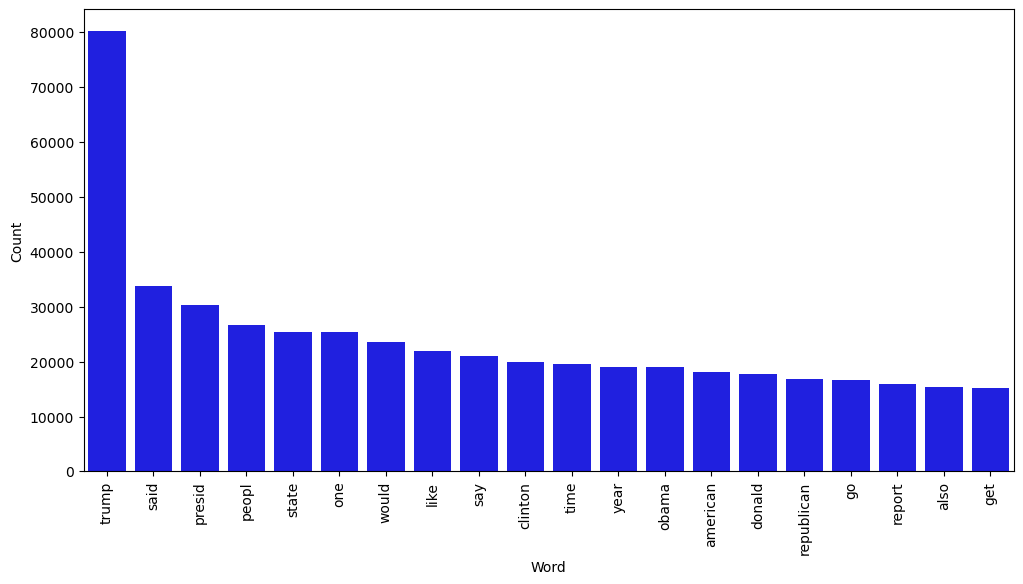

In [23]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

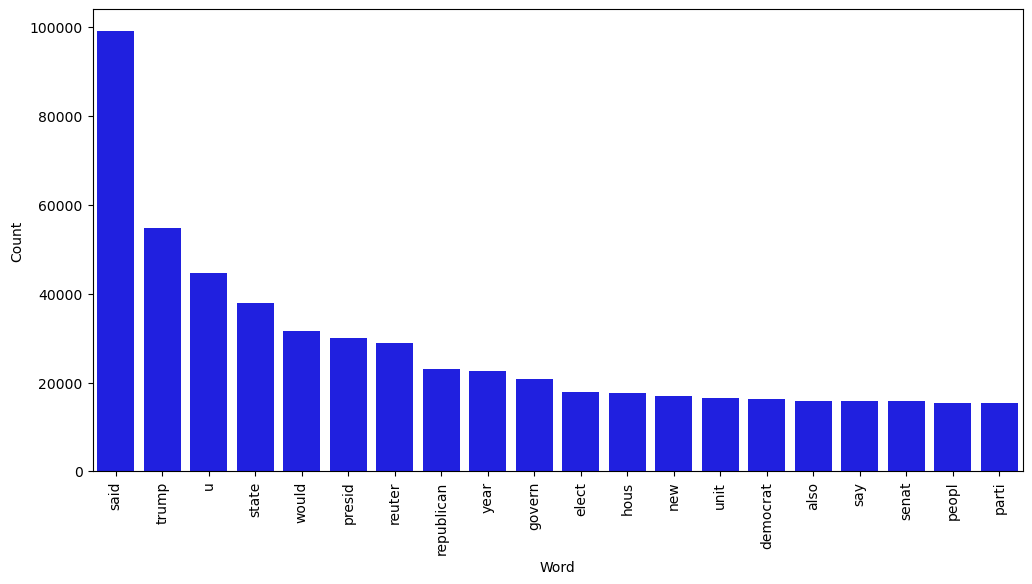

In [24]:
counter(data[data["target"] == "true"], "text", 20)

In [25]:
data['label']=data['target'].map({'true': 1 , 'fake': 0})

In [26]:
data.head()

,title,text,subject,target,label
0,SUNDAY SCREENING: CIA Secret Experiments (2008),st centuri wire say everi sunday editori team ...,US_News,fake,0
1,Mexico's new finance minister spurns Donald Trump,mexico citi reuter mexico new financ minist th...,politicsNews,true,1
2,A PICTURE IS WORTH A THOUSAND WORDS: A Lone So...,gonna go limb guess young man presenc harden r...,politics,fake,0
3,(Video) Judge Jeanine: You Can’t Trust Hillary...,great open statement judg jeanin nail,politics,fake,0
4,"Tillerson, Russia's Lavrov discuss Syria, Ukra...",new york reuter russian foreign minist sergei ...,politicsNews,true,1


In [27]:
X = data['text'].values
Y = data['label'].values

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
vector.fit(X)
X = vector.transform(X)

In [29]:
print(X)

  (0, 87825)	0.08578535065152804
  (0, 86355)	0.07392612105078822
  (0, 84829)	0.07516783246816584
  (0, 81406)	0.12055245670149893
  (0, 78266)	0.05597367633705672
  (0, 76729)	0.11136520137771118
  (0, 76499)	0.0837839743747839
  (0, 75693)	0.059528651857107505
  (0, 74177)	0.13498025887460308
  (0, 73682)	0.08852210256549119
  (0, 72390)	0.1544084500250696
  (0, 69100)	0.13742045643839992
  (0, 65066)	0.04627885911062201
  (0, 62081)	0.13676560553962694
  (0, 60013)	0.06392533815682896
  (0, 58451)	0.14606280900241864
  (0, 58243)	0.1017280484015343
  (0, 54406)	0.0899777513862976
  (0, 54311)	0.18014519579497296
  (0, 52409)	0.11153039251355222
  (0, 52154)	0.21630026420461254
  (0, 51671)	0.08644654125719567
  (0, 49808)	0.229350139173948
  (0, 48855)	0.10361329233669514
  (0, 48368)	0.15333775759750673
  :	:
  (44897, 16719)	0.03628067072654886
  (44897, 16332)	0.06162174583713006
  (44897, 15780)	0.02241175870210775
  (44897, 14873)	0.09411021902602214
  (44897, 14683)	0.0521329

In [30]:
from sklearn.model_selection import train_test_split
X_train , X_test ,Y_train , Y_test = train_test_split(X , Y , test_size = 0.4 )

# NAIVE BAYES

In [31]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, Y_train)
predictions = NB.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4671
           1       0.94      0.93      0.93      4309

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



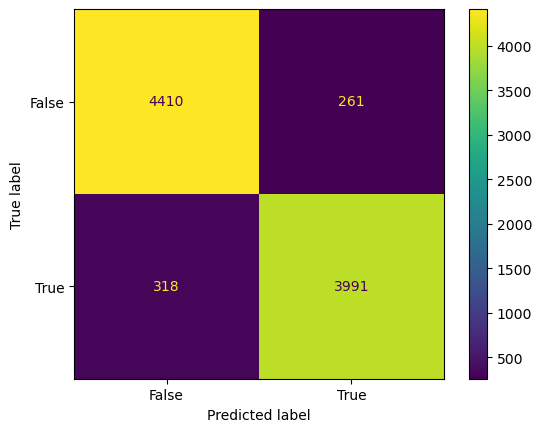

In [33]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()
plt.show()

# LOGISTIC REGRESSION

In [34]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train,Y_train)
predictions = lm.predict(X_test)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4671
           1       0.98      0.99      0.99      4309

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



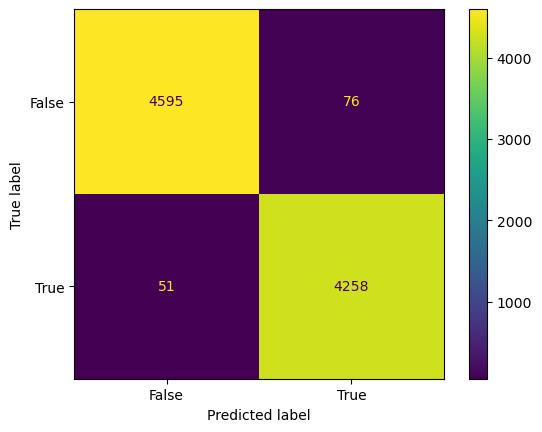

In [36]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()
plt.show()

# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [38]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83      4671
           1       0.93      0.61      0.74      4309

    accuracy                           0.79      8980
   macro avg       0.83      0.78      0.78      8980
weighted avg       0.82      0.79      0.78      8980



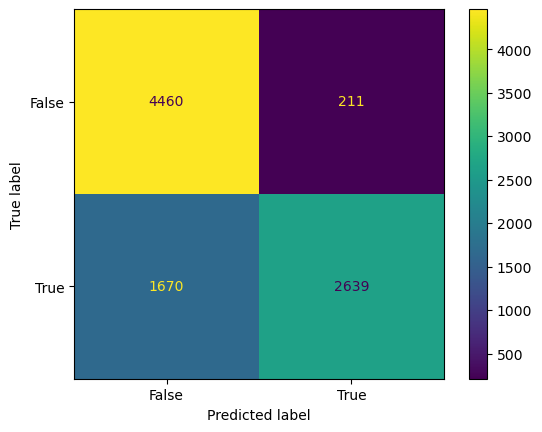

In [39]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()
plt.show()

# SVM

In [40]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4671
           1       0.99      0.99      0.99      4309

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



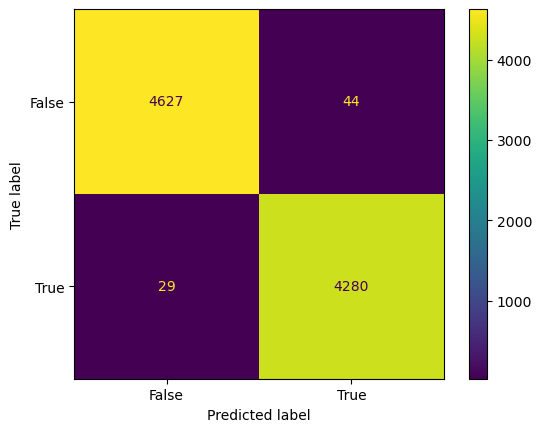

In [42]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()
plt.show()

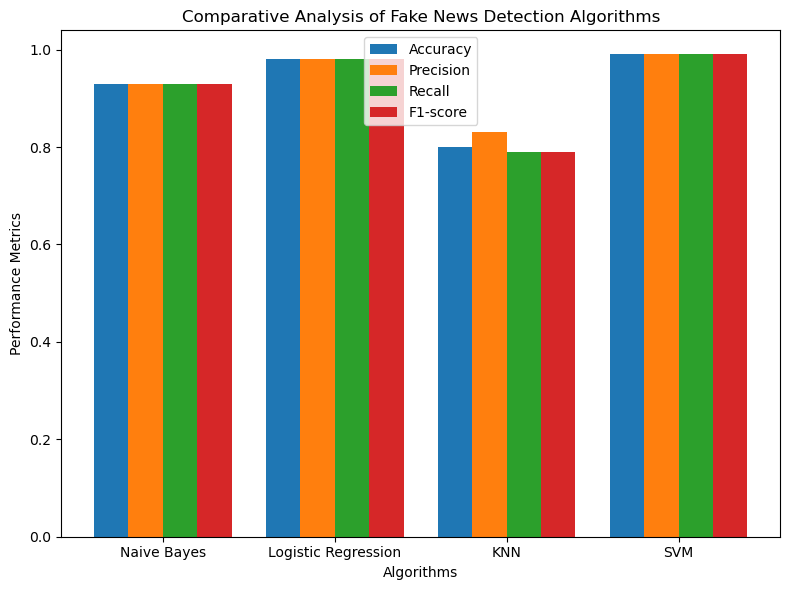

In [43]:
import numpy as np
import matplotlib.pyplot as plt

algorithms = ['Naive Bayes', 'Logistic Regression', 'KNN', 'SVM']

accuracy = [0.93, 0.98, 0.80, 0.99]
precision = [0.93, 0.98, 0.83, 0.99]
recall = [0.93, 0.98, 0.79, 0.99]
f1_score = [0.93, 0.98, 0.79, 0.99]

bar_width = 0.2

position = np.arange(len(algorithms))

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(position - 1.5*bar_width, accuracy, width=bar_width, label='Accuracy')
ax.bar(position - 0.5*bar_width, precision, width=bar_width, label='Precision')
ax.bar(position + 0.5*bar_width, recall, width=bar_width, label='Recall')
ax.bar(position + 1.5*bar_width, f1_score, width=bar_width, label='F1-score')

ax.set_xlabel('Algorithms')
ax.set_ylabel('Performance Metrics')
ax.set_title('Comparative Analysis of Fake News Detection Algorithms')
ax.set_xticks(position)
ax.set_xticklabels(algorithms)
ax.legend()

plt.tight_layout()
plt.show()

In [44]:
%%writefile my_app.py
import streamlit as st
import pickle
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
port_stem = PorterStemmer()
vectorization = TfidfVectorizer()

vector_form = pickle.load(open('vector.pkl', 'rb'))
load_model = pickle.load(open('NB.pkl', 'rb'))

def stemming(content):
    con=re.sub('[^a-zA-Z]', ' ', content)
    con=con.lower()
    con=con.split()
    con=[port_stem.stem(word) for word in con if not word in stopwords.words('english')]
    con=' '.join(con)
    return con

def fake_news(news):
    news=stemming(news)
    input_data=[news]
    vector_form1=vector_form.transform(input_data)
    prediction = load_model.predict(vector_form1)
    return prediction
#%%writefile my_app.py
#import streamlit as st
if __name__ == '__main__':
    st.title('Fake News Detection ')
    st.subheader("Input the News content below")
    sentence = st.text_area("Enter your news content here", "",height=200)
    predict_btt = st.button("predict")
    if predict_btt:
        prediction_class=fake_news(sentence)
        print(prediction_class)
        if prediction_class == [1]:
            st.success('Reliable')
        if prediction_class == [0]:
            st.warning('Unreliable')



Overwriting my_app.py


In [ ]:
!streamlit run my_app.py